# Hello TensorFlow!

In [1]:
import tensorflow as tf

# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# seart a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

/Users/koyo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, TensorFlow!'


In [4]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2) # node3 = node1 + node2

In [5]:
print("node1:", node1, "node2:", node2)
print("node3: ", node3)

node1: Tensor("Const_3:0", shape=(), dtype=float32) node2: Tensor("Const_4:0", shape=(), dtype=float32)
node3:  Tensor("Add:0", shape=(), dtype=float32)


In [6]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(mode3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(mode3):  7.0


 # Computational Graph
- (1) Bulid graph(tensors) using TensorFlow operations

In [7]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0) # also tf.float32 implicitly
node3 = tf.add(node1, node2) # node3 = node1 + node2

 - (2) feed data and run graph(operation)
sess.run(op)
 - (3) update variables in the graph(and return values)

In [8]:
sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(mode3): ", sess.run(node3))

sess.run(node1, node2):  [3.0, 4.0]
sess.run(mode3):  7.0


# Placeholder
 - 그래프는 만들어두고 실행시키는 상황에서 던져주고 싶으면?
 - node를 placeholder로 만들어주자!

In [10]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

adder_node = a + b # + provides a shortcut for tf.add(a,b)

print(sess.run(adder_node, feed_dict={a:3, b:4.5}))
print(sess.run(adder_node, feed_dict={a:[1,3], b:[2,4]}))

7.5
[3. 7.]


# Lab 2. Linear Regression

 - Hypothesis and cost function
 - H(x) = Wx + b
 - W = weight, b = bias, H = Hypothesis
 
## 1. Build graph using TF operations
 

In [11]:
# X and Y data
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW + b
hypothesis = x_train * W + b

Instructions for updating:
Colocations handled automatically by placer.


cost(W, b) = 1/m ㄷ(H(x^i) - y^i)^2

In [13]:
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))



In [15]:
t = [1., 2., 3., 4.]
sess.run(tf.reduce_mean(t))

2.5

# GradientDescent ( Magic ?)

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

## 2. Run/update graph adn get results

In [18]:
# Launch teh graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the Line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))

0 1.4632645 [1.2662098] [0.6575465]
20 0.039714944 [0.8544829] [0.45102838]
40 0.024380527 [0.8233085] [0.41310972]
60 0.02203683 [0.8279928] [0.3921028]
80 0.02001323 [0.8357319] [0.3735238]
100 0.018176321 [0.8434191] [0.35595515]
120 0.01650803 [0.8507747] [0.33922517]
140 0.014992856 [0.8577874] [0.32328266]
160 0.013616749 [0.86447084] [0.3080896]
180 0.012366948 [0.87084025] [0.2936105]
200 0.011231862 [0.8769102] [0.27981183]
220 0.010200966 [0.8826951] [0.26666173]
240 0.009264673 [0.8882079] [0.25412962]
260 0.008414316 [0.89346176] [0.24218646]
280 0.007642023 [0.8984687] [0.23080464]
300 0.0069406093 [0.90324026] [0.21995763]
320 0.0063035744 [0.90778756] [0.20962045]
340 0.0057250117 [0.91212124] [0.1997691]
360 0.005199541 [0.9162512] [0.1903807]
380 0.004722309 [0.9201871] [0.18143354]
400 0.004288877 [0.923938] [0.17290682]
420 0.0038952297 [0.9275127] [0.16478087]
440 0.0035376977 [0.9309193] [0.15703672]
460 0.003213004 [0.9341658] [0.1496566]
480 0.0029180998 [0.93725

# Placeholders

In [19]:
# Now we can use X and Y in place of x_data and y_data
# # placeholders for a tensor that will be always fed using feed_dict
# See http://stackoverflow.com/questions/36693740/
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

for step in range(2001):
    cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],feed_dict={X: [1, 2, 3], Y: [1,2,3]}) 
    
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val)

0 1.9387207e-06 [0.9983867] [0.00366733]
20 1.7608622e-06 [0.9984625] [0.00349501]
40 1.5991287e-06 [0.9985348] [0.00333077]
60 1.4522963e-06 [0.99860364] [0.00317423]
80 1.3191374e-06 [0.9986692] [0.00302509]
100 1.1981975e-06 [0.99873173] [0.00288294]
120 1.0880909e-06 [0.99879134] [0.00274748]
140 9.881895e-07 [0.9988482] [0.00261837]
160 8.9762426e-07 [0.99890226] [0.00249533]
180 8.153166e-07 [0.9989538] [0.00237809]
200 7.403421e-07 [0.999003] [0.00226635]
220 6.723645e-07 [0.99904984] [0.00215985]
240 6.1081727e-07 [0.9990945] [0.0020584]
260 5.548089e-07 [0.999137] [0.00196171]
280 5.0382596e-07 [0.9991776] [0.00186954]
300 4.5755624e-07 [0.9992162] [0.0017817]
320 4.1564394e-07 [0.999253] [0.00169799]
340 3.7748532e-07 [0.9992881] [0.00161824]
360 3.4290133e-07 [0.9993216] [0.0015422]
380 3.1139115e-07 [0.99935335] [0.00146976]
400 2.8288844e-07 [0.9993837] [0.00140075]
420 2.5689232e-07 [0.99941266] [0.00133499]
440 2.3337986e-07 [0.9994403] [0.0012723]
460 2.1196057e-07 [0.9

In [33]:
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# Our hypothesis XW+b
hypothesis = X * W + b
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the Line with new training data
for step in range(2001):
    cost_val, W_val, b_val, hypo, _ = sess.run([cost, W, b, hypothesis, train], feed_dict={X: [1,2,3,4,5], Y: [2.1, 3.1, 4.1, 5.1, 6.1]})
    
    if step % 20 == 0:
        print(step, cost_val, W_val, b_val, hypo)

0 9.078261 [0.77002394] [-0.5213526] [-0.0045101  0.5713867  1.1472836  1.7231803  2.299077 ]
20 0.33511013 [1.3716118] [-0.25271043] [1.114458  2.4864573 3.8584566 5.230456  6.602455 ]
40 0.29249927 [1.3499238] [-0.16338651] [1.1834334 2.5345404 3.8856473 5.2367544 6.5878615]
60 0.25544173 [1.327019] [-0.08064296] [1.2434801 2.5716085 3.899737  5.227865  6.5559936]
80 0.22307916 [1.3056024] [-0.00332171] [1.2995745 2.6062138 3.912853  5.219492  6.526131 ]
100 0.19481674 [1.2855883] [0.06893567] [1.351995  2.638552  3.925109  5.211666  6.4982233]
120 0.17013486 [1.2668848] [0.13646095] [1.4009824 2.6687727 3.9365628 5.204353  6.472143 ]
140 0.14858004 [1.2494063] [0.1995639] [1.4467616 2.6970139 3.9472666 5.197519  6.447771 ]
160 0.12975606 [1.2330725] [0.2585342] [1.4895428 2.723406  3.9572692 5.1911325 6.424996 ]
180 0.11331689 [1.2178085] [0.3136425] [1.5295222 2.7480695 3.9666169 5.1851645 6.4037113]
200 0.09896049 [1.203544] [0.36514166] [1.5668832 2.7711177 3.975352  5.1795864 6.

1760 2.5503257e-06 [1.0010334] [1.0962691] [2.0972934 3.0983303 4.099367  5.100404  6.1014404]
1780 2.2272725e-06 [1.0009656] [1.0965135] [2.0974708 3.0984397 4.0994086 5.1003776 6.1013465]
1800 1.94504e-06 [1.0009024] [1.096742] [2.0976365 3.098542  4.0994473 5.1003532 6.1012583]
1820 1.6987411e-06 [1.0008434] [1.0969553] [2.0977912 3.0986376 4.0994835 5.10033   6.1011763]
1840 1.4837309e-06 [1.0007881] [1.0971545] [2.0979357 3.0987265 4.0995173 5.1003084 6.101099 ]
1860 1.2958783e-06 [1.0007366] [1.0973408] [2.0980709 3.09881   4.0995493 5.1002884 6.1010275]
1880 1.131709e-06 [1.0006883] [1.0975149] [2.098197  3.0988874 4.0995784 5.100269  6.1009593]
1900 9.882866e-07 [1.0006433] [1.0976776] [2.0983152 3.0989604 4.099606  5.100251  6.100897 ]
1920 8.6325116e-07 [1.0006013] [1.0978296] [2.0984254 3.0990288 4.0996323 5.1002355 6.1008387]
1940 7.540087e-07 [1.000562] [1.0979716] [2.0985284 3.0990925 4.099656  5.10022   6.100784 ]
1960 6.585851e-07 [1.0005252] [1.0981042] [2.0986247 3.09

In [30]:
 # Testing our model
print(sess.run(hypothesis, feed_dict={X: [5]}))
print(sess.run(hypothesis, feed_dict={X: [2.5]}))
print(sess.run(hypothesis, feed_dict={X: [1.5, 3.5]}))

[6.0999928]
[3.6000056]
[2.6000106 4.6000004]


# Lab 3. Minimizing Cost
 - H(x) = Wx (+b)
 - cost(W) = 1/mㄷ(Wx^i - y^i)^2
 
 cost가 최저가 되는 w를 찾자!

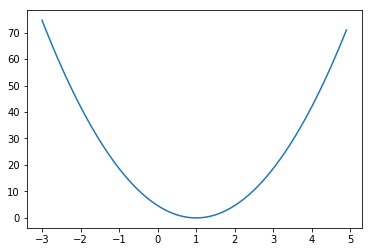

In [35]:
import matplotlib.pyplot as plt

X=[1,2,3]
Y=[1,2,3]

W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/Lost function
cost = tf.reduce_mean(tf.square(hypothesis - Y ))
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)
    
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

In [37]:
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/Loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= Learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)


# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))

0 13.254265 [0.02699786]
1 3.7701018 [0.48106554]
2 1.0723844 [0.72323495]
3 0.30503386 [0.85239196]
4 0.08676508 [0.92127573]
5 0.024679892 [0.9580137]
6 0.007020048 [0.9776073]
7 0.0019967994 [0.98805726]
8 0.0005679778 [0.9936305]
9 0.00016156025 [0.99660295]
10 4.5953766e-05 [0.99818826]
11 1.3070625e-05 [0.99903375]
12 3.717711e-06 [0.99948466]
13 1.0573971e-06 [0.99972516]
14 3.0069737e-07 [0.99985343]
15 8.561619e-08 [0.9999218]
16 2.4371616e-08 [0.9999583]
17 6.9279515e-09 [0.99997777]
18 1.9654358e-09 [0.99998814]
19 5.6338934e-10 [0.9999937]
20 1.5597834e-10 [0.99999666]


In [40]:
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights

W = tf.Variable(-3.0)

# Linear model
hypothesis = X * W
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run(W))
    sess.run(train)


0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 1.0
24 1.0
25 1.0
26 1.0
27 1.0
28 1.0
29 1.0
30 1.0
31 1.0
32 1.0
33 1.0
34 1.0
35 1.0
36 1.0
37 1.0
38 1.0
39 1.0
40 1.0
41 1.0
42 1.0
43 1.0
44 1.0
45 1.0
46 1.0
47 1.0
48 1.0
49 1.0
50 1.0
51 1.0
52 1.0
53 1.0
54 1.0
55 1.0
56 1.0
57 1.0
58 1.0
59 1.0
60 1.0
61 1.0
62 1.0
63 1.0
64 1.0
65 1.0
66 1.0
67 1.0
68 1.0
69 1.0
70 1.0
71 1.0
72 1.0
73 1.0
74 1.0
75 1.0
76 1.0
77 1.0
78 1.0
79 1.0
80 1.0
81 1.0
82 1.0
83 1.0
84 1.0
85 1.0
86 1.0
87 1.0
88 1.0
89 1.0
90 1.0
91 1.0
92 1.0
93 1.0
94 1.0
95 1.0
96 1.0
97 1.0
98 1.0
99 1.0


# Optional : compute_gradient and apply_gradient

 - 우리가 구한거랑 컴퓨터가 구해주는거랑 비교해보자

In [45]:
X = [1,2,3]
Y = [1,2,3]

# Set wrong model weights
W = tf.Variable(5.)
# Linear model
hypothesis = X * W
# Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X ) * 2
# cost/Loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)


# Get gradients
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

# Launch the graph in a session.
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    print(step, sess.run([gradient, W, gvs]))
    sess.run(apply_gradients)

0 [37.333332, 5.0, [(37.333336, 5.0)]]
1 [33.84889, 4.6266665, [(33.84889, 4.6266665)]]
2 [30.689657, 4.2881775, [(30.689657, 4.2881775)]]
3 [27.825287, 3.9812808, [(27.825287, 3.9812808)]]
4 [25.228262, 3.703028, [(25.228262, 3.703028)]]
5 [22.873621, 3.4507453, [(22.873623, 3.4507453)]]
6 [20.738752, 3.2220092, [(20.73875, 3.2220092)]]
7 [18.803137, 3.0146217, [(18.803137, 3.0146217)]]
8 [17.048176, 2.8265903, [(17.048176, 2.8265903)]]
9 [15.457013, 2.6561086, [(15.457014, 2.6561086)]]
10 [14.014359, 2.5015385, [(14.01436, 2.5015385)]]
11 [12.706352, 2.361395, [(12.706352, 2.361395)]]
12 [11.520427, 2.2343314, [(11.520427, 2.2343314)]]
13 [10.445186, 2.119127, [(10.445185, 2.119127)]]
14 [9.470302, 2.0146751, [(9.470302, 2.0146751)]]
15 [8.586407, 1.9199722, [(8.586407, 1.9199722)]]
16 [7.785009, 1.8341081, [(7.785009, 1.8341081)]]
17 [7.0584083, 1.756258, [(7.0584083, 1.756258)]]
18 [6.399624, 1.685674, [(6.399624, 1.685674)]]
19 [5.8023257, 1.6216778, [(5.8023252, 1.6216778)]]
20 [

In [22]:
import tensorflow as tf
x = [1,2,3]
y = [1,2,3]

w = tf.Variable(5.0)

hypo = x*w
cost = tf.reduce_mean(tf.square(hypo-y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(100):
    cost_val, w_val, _ = sess.run([cost, w, train])
    print(cost_val, w_val)
#     print(step, sess.run(w))
#     sess.run(train)


74.666664 1.2666664
0.3318512 1.0177778
0.0014748968 1.0011852
6.555027e-06 1.000079
2.91322e-08 1.0000052
1.2839034e-10 1.0000004
5.163277e-13 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 1.0
